In [3]:
#Import libraries amd load dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Load wine dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

In [4]:
df = pd.DataFrame(X, columns=feature_names)
df['Target']=y
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
#Apply standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

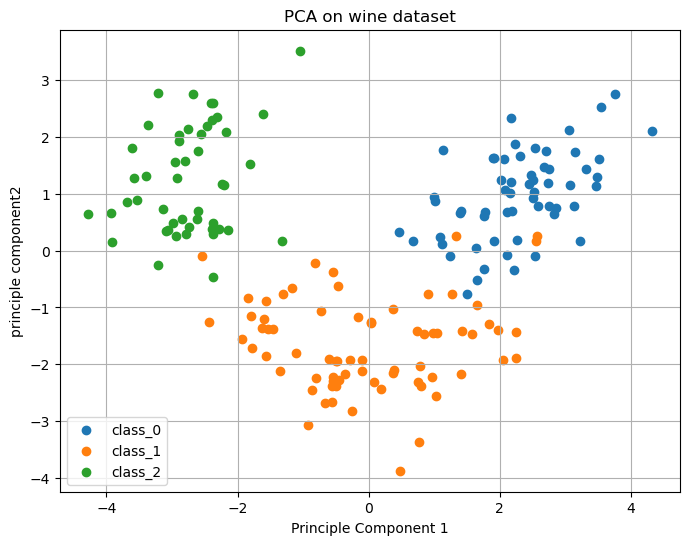

In [6]:
#Apply PCA
pca = PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)
X_pca[:5]

plt.figure(figsize=(8,6))
for i,target_name in enumerate(target_names):
    plt.scatter(X_pca[y==i,0],X_pca[y==i,1],label=target_name)
plt.xlabel('Principle Component 1')
plt.ylabel('principle component2')
plt.title('PCA on wine dataset')
plt.legend()
plt.grid(True)
plt.show()

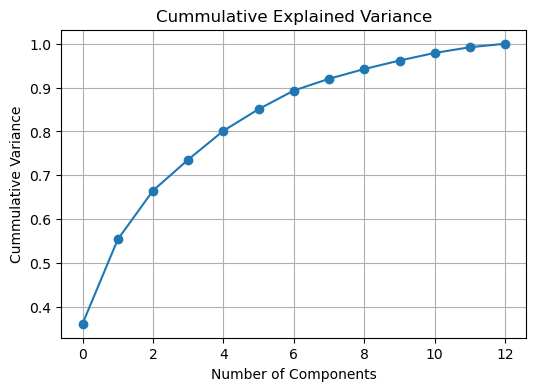

In [8]:
#Explained Variance Ratio and Screen Plot

pca_full = PCA().fit(X_scaled)
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.title("Cummulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cummulative Variance")
plt.grid(True)
plt.show()